In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Try to detec cell with cytoplasm border

Number of cells detected: 6


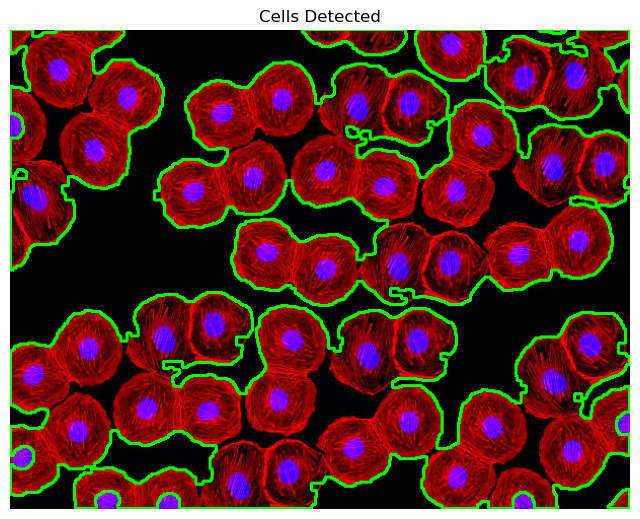

In [10]:
# Load the image
image = cv2.imread("test_image.jpg")

# Convert to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color thresholds for red (cells) and blue (nuclei)
lower_red1 = np.array([0, 70, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 70, 50])
upper_red2 = np.array([180, 255, 255])

# Red mask for cytoplasm (combine two ranges for red)
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask_red1, mask_red2)

# Apply morphological operations to remove noise
kernel = np.ones((5, 5), np.uint8)
red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_CLOSE, kernel)
red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_OPEN, kernel)

# Find contours in the red mask
contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours based on area (optional)
min_area = 50  # Adjust based on cell size
cell_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Draw contours on the original image (optional, for visualization)
output_image = image.copy()
cv2.drawContours(output_image, cell_contours, -1, (0, 255, 0), 2)

# Count the cells
cell_count = len(cell_contours)
print("Number of cells detected:", cell_count)

# Draw contours on the original image
# output_image = image.copy()
# cv2.drawContours(output_image, cell_contours, -1, (0, 255, 0), 2)

# Show the result
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.title("Cells Detected")
plt.show()


6 cells are detected. border are correctly recognized but the work is incomplete because some cells are overlapped.

Lets use the nucleus as a detection pattern

```lower_blue = np.array([90, 50, 50])```

Hue = 90: This is the start of the blue range. You may want to lower this value to include more shades of blue if needed.

Saturation = 50: This indicates a minimum saturation. Increasing this will require the color to be more vivid, potentially excluding dimly lit nuclei. If you're missing some nuclei, try lowering this value.

Value = 50: This indicates a minimum brightness. Increasing this will ensure only brighter regions are considered. If your nuclei are darker, try lowering this value.

```upper_blue = np.array([130, 255, 255])```

Hue = 130: This is the end of the blue range. You might want to increase this to include more shades of blue.

Saturation = 255: This allows for the highest intensity of blue colors. You can adjust this lower if you want to include less intense blue shades.

Value = 255: This indicates the brightest possible colors. If your nuclei are somewhat dimmer, lowering this value might help detect them.

<img src="Hsl-hsv_models.svg" width="400"/>

Number of cells detected: 51


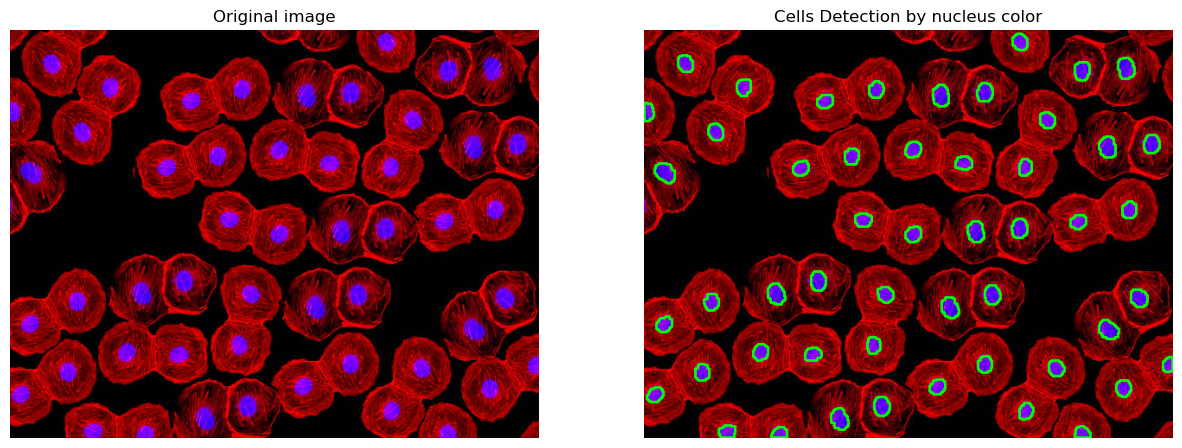

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("test_image.jpg")

# Convert to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color thresholds for blue detection
lower_blue = np.array([100, 150, 50])  # Lower bound for blue
upper_blue = np.array([140, 255, 255])  # Upper bound for blue

# Create a mask for the blue nucleus : its like a filter that let only the blue passing
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Apply morphological operations to remove noise
kernel = np.ones((5, 5), np.uint8)
blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_CLOSE, kernel)
blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)

# Find contours in the blue mask
contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours based on area (optional)
min_area = 50  # Adjust based on nucleus size
nucleus_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Draw contours on the original image (for visualization)
output_image = image.copy()
cv2.drawContours(output_image, nucleus_contours, -1, (0, 255, 0), 2)  # Green contours for nuclei

# Count the cells
cell_count = len(nucleus_contours)
print("Number of cells detected:", cell_count)

# Show the result
plt.figure(figsize=(15, 8))

plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Original image")

plt.subplot(122)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.title("Cells Detection by nucleus color")

plt.show()

Cells are really well detected by nucleus BUT cells on the border (with non visible nucleus) can't be detected